In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [9]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/Loan prediction analysis dataset (1).csv')

In [10]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<ipython-input-11-dfe9d73176e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(loan_dataset, x='Education', y='Dependents', inner='stick', palette='Dark2')


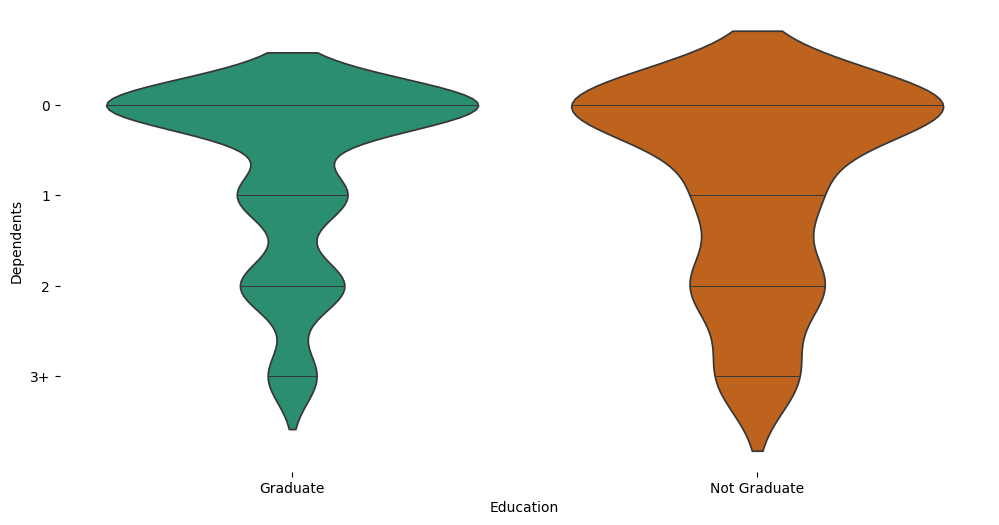

In [11]:
# @title Dependents vs Education

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(loan_dataset['Dependents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(loan_dataset, x='Education', y='Dependents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

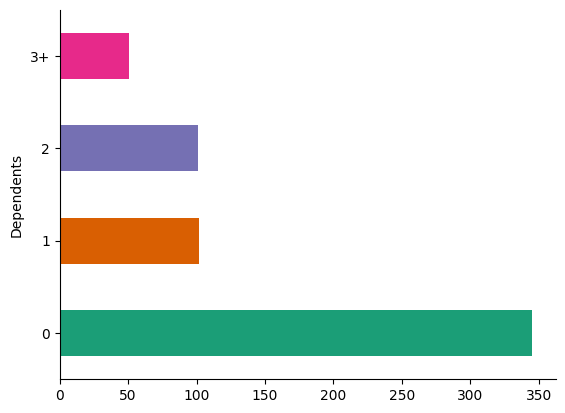

In [12]:
# @title Dependents

from matplotlib import pyplot as plt
import seaborn as sns
loan_dataset.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# @title Education

from matplotlib import pyplot as plt
loan_dataset['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

TypeError: no numeric data to plot

In [ ]:
# @title Married

from matplotlib import pyplot as plt
loan_dataset['Married'].plot(kind='hist', bins=20, title='Married')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
loan_dataset['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
loan_dataset.shape

(614, 13)

In [14]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [17]:
loan_dataset = loan_dataset.dropna()

In [18]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [19]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)                                                                                                                         #inplace = True , the data is modified in place, which means it will return nothing and the dataframe is noace=Truew updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.

<ipython-input-19-af24b40b33bd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)                                                                                                                         #inplace = True , the data is modified in place, which means it will return nothing and the dataframe is noace=Truew updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.


In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [21]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [22]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [23]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

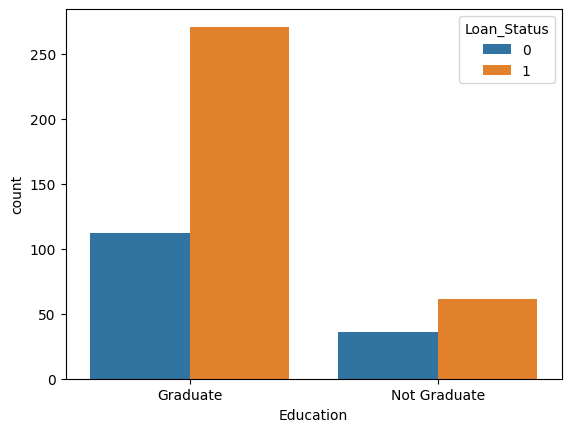

In [24]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

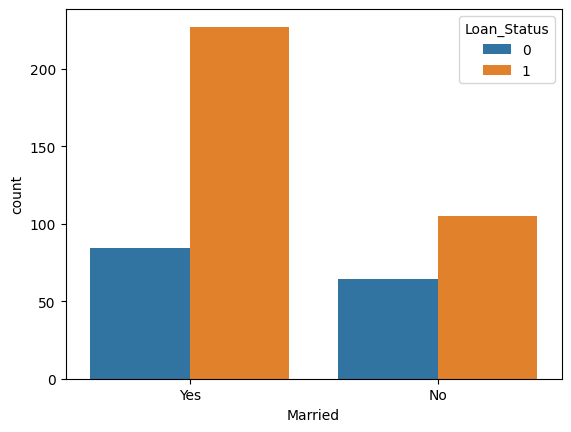

In [25]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [26]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-26-cc448655d7b3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [27]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

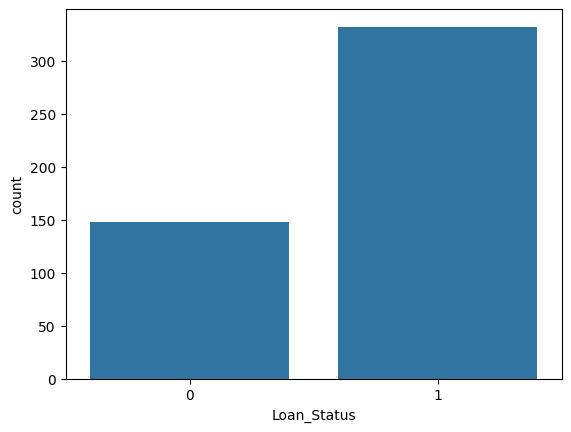

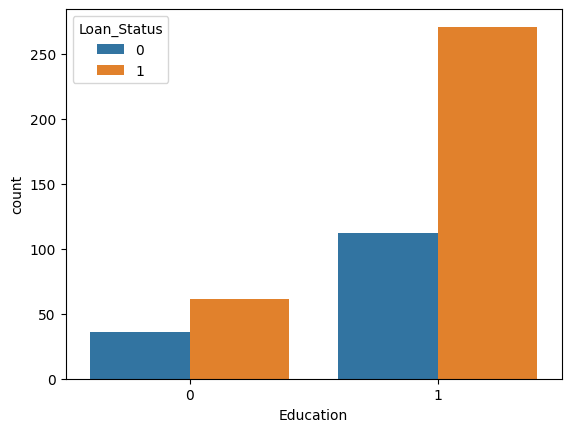

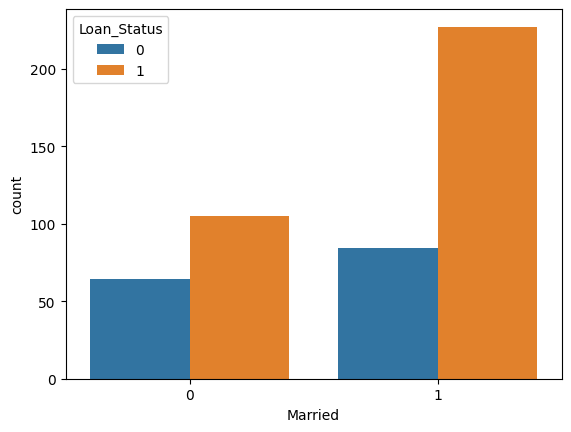

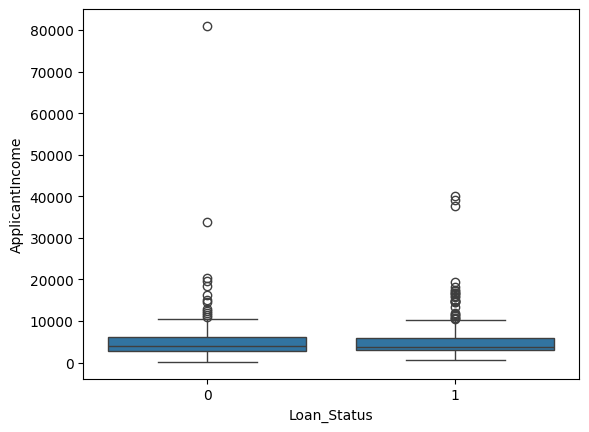

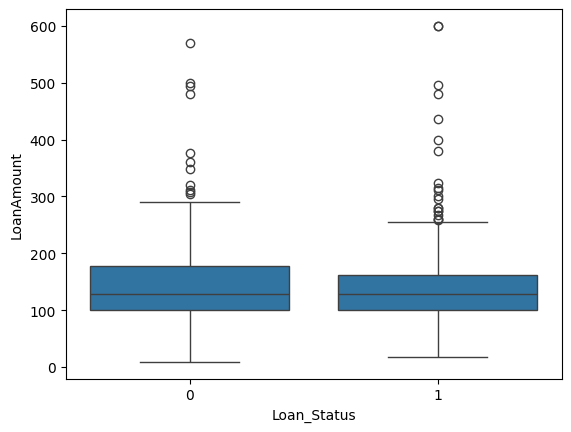

ValueError: could not convert string to float: 'LP001003'

In [28]:
# Visualize the distribution of the target variable ('Loan_Status')
sns.countplot(x='Loan_Status', data=loan_dataset)
plt.show()

# Explore relationships between categorical features and the target variable
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)
plt.show()

sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)
plt.show()

# Explore relationships between numerical features and the target variable
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_dataset)
plt.show()

sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_dataset)
plt.show()

# Explore correlations between numerical features
correlation_matrix = loan_dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [29]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [30]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)                                                                                            #to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0 's and 75% of 1 's., random state=2 controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions.

In [31]:
print(X.shape, X_train.shape, X_test.shape,Y.shape,Y_train.shape)                                                                                                                                        #x_train: The training part of the first sequence (x)x_test: The test part of the first sequence (x) y_train: The training part of the second sequence (y) y_test: The test part of the second sequence (y)


(480, 11) (432, 11) (48, 11) (480,) (432,)


In [32]:
classifier = svm.SVC(kernel='linear')

In [33]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [34]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [35]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [36]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [41]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [37]:
import sqlite3
from sqlalchemy import create_engine

# Create an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)

# Load the dataframe into the database
loan_dataset.to_sql('LoanPrediction', con=engine, if_exists='replace', index=False)

480

In [38]:
%load_ext sql

In [39]:
%sql sqlite:///

In [42]:
# Example queries:
query1 = """
SELECT Loan_Status, AVG(LoanAmount) AS AverageLoanAmount
FROM LoanPrediction
GROUP BY Loan_Status;
"""

query2 = """
SELECT Property_Area, Loan_Status, COUNT(*) AS LoanCount
FROM LoanPrediction
GROUP BY Property_Area, Loan_Status;
"""

# Fetch the results using pandas
result1 = pd.read_sql_query(query1, engine)
result2 = pd.read_sql_query(query2, engine)

# Display the results
print("Average Loan Amount by Loan Status:")
print(result1)

print("\nLoan Count by Property Area and Loan Status:")
print(result2)

Average Loan Amount by Loan Status:
   Loan_Status  AverageLoanAmount
0            0         153.378378
1            1         140.882530

Loan Count by Property Area and Loan Status:
   Property_Area  Loan_Status  LoanCount
0              0            0         54
1              0            1         85
2              1            0         42
3              1            1        149
4              2            0         52
5              2            1         98


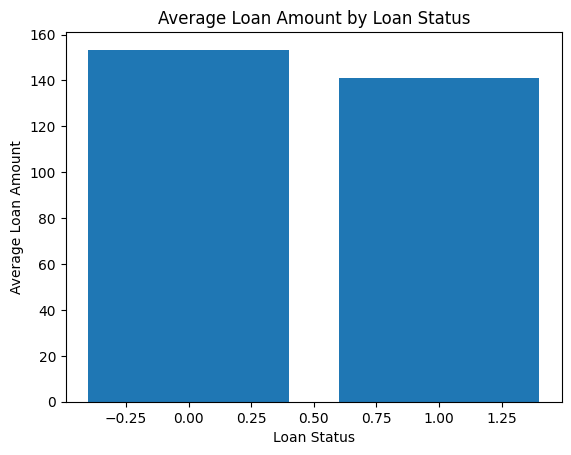

In [43]:
# Execute a query and store results in a pandas DataFrame
query = """
SELECT Loan_Status, AVG(LoanAmount) AS AverageLoanAmount
FROM LoanPrediction
GROUP BY Loan_Status;
"""
result = pd.read_sql_query(query, engine)

# Visualize the results using matplotlib
import matplotlib.pyplot as plt
plt.bar(result['Loan_Status'], result['AverageLoanAmount'])
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Loan Status')
plt.show()

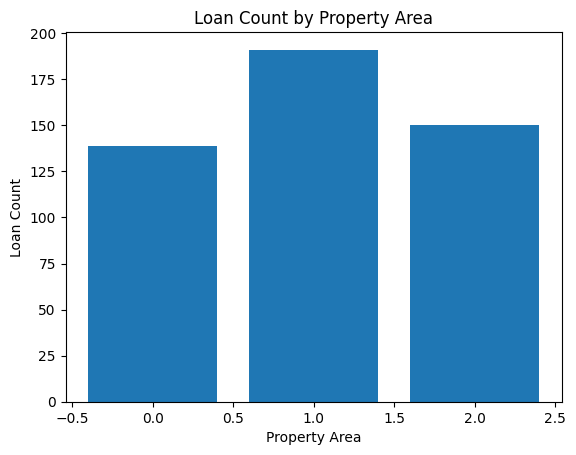

In [44]:
query="""SELECT Property_Area, COUNT(*) AS LoanCount
FROM LoanPrediction
GROUP BY Property_Area; """
result = pd.read_sql_query(query, engine)
plt.bar(result['Property_Area'], result['LoanCount'])
plt.xlabel('Property Area')
plt.ylabel('Loan Count')
plt.title('Loan Count by Property Area')
plt.show()

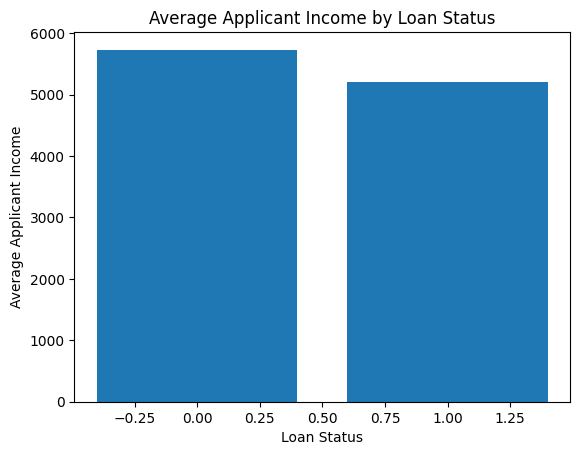

In [45]:
query="""SELECT Loan_Status, AVG(ApplicantIncome) AS AverageApplicantIncome
FROM LoanPrediction
GROUP BY Loan_Status; """
result = pd.read_sql_query(query, engine)
plt.bar(result['Loan_Status'], result['AverageApplicantIncome'])
plt.xlabel('Loan Status')
plt.ylabel('Average Applicant Income')
plt.title('Average Applicant Income by Loan Status')
plt.show()

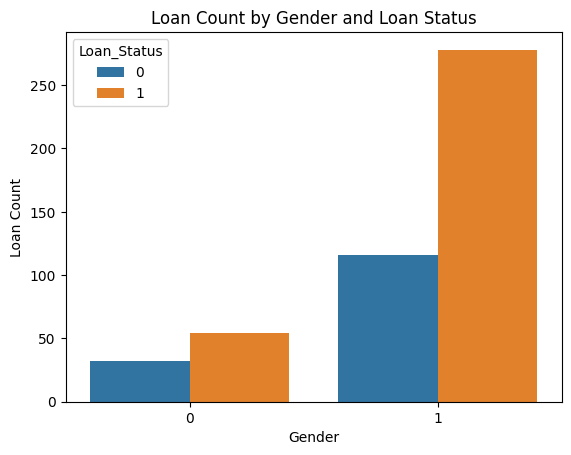

In [46]:
query="""SELECT Gender, Loan_Status, COUNT(*) AS LoanCount
FROM LoanPrediction
GROUP BY Gender, Loan_Status; """

result = pd.read_sql_query(query, engine)
sns.barplot(x='Gender', y='LoanCount', hue='Loan_Status', data=result)
plt.xlabel('Gender')
plt.ylabel('Loan Count')
plt.title('Loan Count by Gender and Loan Status')
plt.show()

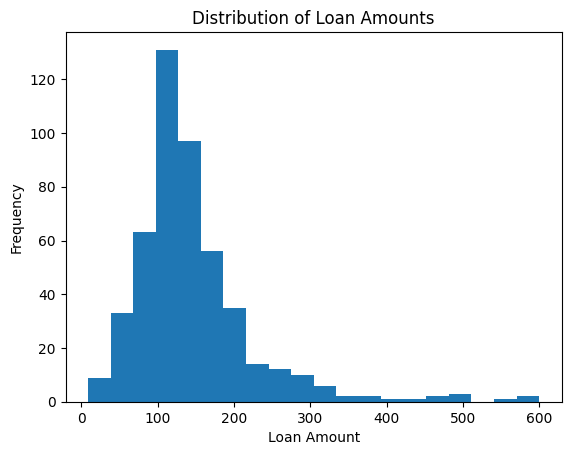

In [47]:
query="""SELECT LoanAmount
FROM LoanPrediction; """

result = pd.read_sql_query(query, engine)
plt.hist(result['LoanAmount'], bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="loan_prediction_map")

# Assuming your dataset has a 'Address' column
loan_dataset['Coordinates'] = loan_dataset['Address'].apply(geolocator.geocode)

loan_dataset['Latitude'] = loan_dataset['Coordinates'].apply(lambda loc: loc.latitude if loc else None)
loan_dataset['Longitude'] = loan_dataset['Coordinates'].apply(lambda loc: loc.longitude if loc else None)

In [1]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [2]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

# Load dataset
file_path = "/content/Loan prediction analysis dataset (1).csv"
df = pd.read_csv(file_path)

# Initialize Dash app
app = dash.Dash(__name__)

# Pie chart for Loan Approval Distribution
fig_pie = px.pie(df, names='Loan_Status', title='Loan Approval Distribution')

# Scatter plot for Income vs Loan Amount
df_clean = df.dropna(subset=['ApplicantIncome', 'LoanAmount'])
fig_scatter = px.scatter(df_clean, x='ApplicantIncome', y='LoanAmount', color='Loan_Status',
                         title='Income vs Loan Amount')

# Bar chart for Loan Approval by Property Area
df_area = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count')
fig_bar = px.bar(df_area, x='Property_Area', y='Count', color='Loan_Status',
                 barmode='group', title='Loan Approval by Property Area')

# Layout
app.layout = html.Div(children=[
    html.H1("Loan Prediction Dashboard", style={'textAlign': 'center'}),
    dcc.Graph(figure=fig_pie),
    dcc.Graph(figure=fig_scatter),
    dcc.Graph(figure=fig_bar)
])

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>